# Generating a Bench Mark Strategy 

Implementing a buy and hold strategy to simulate most investors in the market who usually hold historically reliable stock on the S&P500 such as the ones we are using, to show that our strategiy can outperform this

In [1]:
# loading in libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# loading in stock data 

raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])

names_full = ['AAPL','AMZN', 'BA', 'CAT', 'CVX', 'GOOGL', 'GS', 'JNJ', 'JPM', 'KO','MCD', 'MSFT','NKE','NVDA','PFE','SOFI', 'TSLA', 'UNH', 'WMT','XOM']

names = ['AMZN','CAT','GS', 'JNJ','JPM','NKE','NVDA','SOFI','WMT', 'XOM']


/var/folders/2j/h6y_zlpd5sq1fhr8v9460g600000gn/T/ipykernel_96457/1255623039.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])


In [4]:
stock_eod = pd.DataFrame(raw['Close']) # Gathering Closing Price data 
stock_eod = stock_eod[names] # extracting the data for the teams 10 selected stocks 

dates = stock_eod.index
index = dates.get_loc('2024-03-01') # Cutting off data to only trade on specified "Trading period Dates"
stock_eod_bench = stock_eod[index:]

cols = stock_eod_bench[names]
log_cols = []

# Generating Log Returns for the 10 specific stocks 
for col in cols:
    stock_eod_bench[f'log_ret_{col}'] = np.log(stock_eod_bench[col]) - np.log(stock_eod_bench[col].shift(1))
    log_cols.append(f'log_ret_{col}')


stock_eod_benchmark = stock_eod_bench.dropna()

stock_eod_benchmark.head()

/var/folders/2j/h6y_zlpd5sq1fhr8v9460g600000gn/T/ipykernel_96457/3345136678.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_eod_bench[f'log_ret_{col}'] = np.log(stock_eod_bench[col]) - np.log(stock_eod_bench[col].shift(1))
/var/folders/2j/h6y_zlpd5sq1fhr8v9460g600000gn/T/ipykernel_96457/3345136678.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_eod_bench[f'log_ret_{col}'] = np.log(stock_eod_bench[col]) - np.log(stock_eod_bench[col].shift(1))
/var/folders/2j/h6y_zlpd5sq1fhr8v9460g600000

Ticker,AMZN,CAT,GS,JNJ,JPM,NKE,NVDA,SOFI,WMT,XOM,log_ret_AMZN,log_ret_CAT,log_ret_GS,log_ret_JNJ,log_ret_JPM,log_ret_NKE,log_ret_NVDA,log_ret_SOFI,log_ret_WMT,log_ret_XOM
Date,,,,,,,,,,,,,,,,,,,,
2024-03-04,177.580002,333.625275,385.686829,156.111267,182.507858,98.210945,85.212837,8.58,58.597641,101.855453,-0.003598,0.005775,0.010636,-0.014164,0.007474,-0.023236,0.035320,-0.046679,0.009148,-0.014082
2024-03-05,174.119995,328.581268,384.369232,156.238251,184.336060,96.997368,85.943665,7.27,59.328873,103.104736,-0.019677,-0.015234,-0.003422,0.000813,0.009967,-0.012434,0.008540,-0.165678,0.012402,0.012191
2024-03-06,173.509995,330.650147,383.051666,155.622940,185.294174,96.326447,88.679016,7.40,59.852596,104.207611,-0.003509,0.006277,-0.003434,-0.003946,0.005184,-0.006941,0.031331,0.017724,0.008789,0.010640
2024-03-07,176.820007,335.171997,381.930725,155.163895,183.671265,96.878975,92.647072,7.47,59.645084,104.793213,0.018897,0.013583,-0.002931,-0.002954,-0.008797,0.005720,0.043774,0.009415,-0.003473,0.005604
2024-03-08,175.350006,334.157257,380.514770,155.798752,184.013458,97.836021,87.507301,7.71,59.407928,105.778976,-0.008348,-0.003032,-0.003714,0.004083,0.001861,0.009830,-0.057075,0.031623,-0.003984,0.009363


In [8]:
# A function which takes in the log returns and wealth and outputs a column showing the amount made over trading period by utilising 
# benchmar strategy until final trading day 
def buy_and_hold_benchmark(wealth: float, df: pd.DataFrame, log_ret_stock: str) -> pd.Series:
    if log_ret_stock not in df.columns:
        raise ValueError(f"Stock '{log_ret_stock}' not found in DataFrame columns.")

    cum_log_returns = df[log_ret_stock].cumsum()
    investment_amount = wealth / 10
    benchmark = investment_amount * np.exp(cum_log_returns)

    return benchmark

# Constants
wealth = 50000
log_return_columns = [
    "log_ret_AMZN", "log_ret_CAT", "log_ret_GS", "log_ret_JNJ", "log_ret_JPM",
    "log_ret_NKE", "log_ret_NVDA", "log_ret_SOFI", "log_ret_WMT", "log_ret_XOM"
]

# Create the output DataFrame
benchmark_df = pd.DataFrame(index=stock_eod_benchmark.index)

for stock_col in log_return_columns:
    benchmark_df[stock_col] = buy_and_hold_benchmark(wealth, stock_eod_benchmark, stock_col)

benchmark_df.head()


,log_ret_AMZN,log_ret_CAT,log_ret_GS,log_ret_JNJ,log_ret_JPM,log_ret_NKE,log_ret_NVDA,log_ret_SOFI,log_ret_WMT,log_ret_XOM
Date,,,,,,,,,,
2024-03-04,4982.044681,5028.956826,5053.465663,4929.681420,5037.509135,4885.159128,5179.754218,4771.968934,5045.949915,4930.083527
2024-03-05,4884.973458,4952.925146,5036.201843,4933.691308,5087.970419,4824.793982,5224.178345,4043.381627,5108.917612,4990.552244
2024-03-06,4867.859761,4984.110730,5018.938422,4914.261031,5114.415916,4791.421353,5390.449640,4115.684251,5154.016408,5043.934412
2024-03-07,4960.722874,5052.271607,5004.251279,4899.765296,5069.621012,4818.904940,5631.652187,4154.616229,5136.147179,5072.279146
2024-03-08,4919.481678,5036.975753,4985.698719,4919.812813,5079.066106,4866.509863,5319.225693,4288.098017,5115.725250,5119.992805


In [9]:
column_mapping = {
    'log_ret_AMZN': 'AMZN Benchmark',
    'log_ret_CAT': 'CAT Benchmark',
    'log_ret_GS': 'GS Benchmark',
    'log_ret_JNJ': 'JNJ Benchmark',
    'log_ret_JPM': 'JPM Benchmark',
    'log_ret_NKE': 'NKE Benchmark',
    'log_ret_NVDA': 'NVDA Benchmark',
    'log_ret_SOFI': 'SOFI Benchmark',
    'log_ret_WMT': 'WMT Benchmark',
    'log_ret_XOM': 'XOM Benchmark'
}

# Apply the renaming using the mapping
benchmark_df = benchmark_df.rename(columns=column_mapping)
benchmark_df

,AMZN Benchmark,CAT Benchmark,GS Benchmark,JNJ Benchmark,JPM Benchmark,NKE Benchmark,NVDA Benchmark,SOFI Benchmark,WMT Benchmark,XOM Benchmark
Date,,,,,,,,,,
2024-03-04,4982.044681,5028.956826,5053.465663,4929.681420,5037.509135,4885.159128,5179.754218,4771.968934,5045.949915,4930.083527
2024-03-05,4884.973458,4952.925146,5036.201843,4933.691308,5087.970419,4824.793982,5224.178345,4043.381627,5108.917612,4990.552244
2024-03-06,4867.859761,4984.110730,5018.938422,4914.261031,5114.415916,4791.421353,5390.449640,4115.684251,5154.016408,5043.934412
2024-03-07,4960.722874,5052.271607,5004.251279,4899.765296,5069.621012,4818.904940,5631.652187,4154.616229,5136.147179,5072.279146
2024-03-08,4919.481678,5036.975753,4985.698719,4919.812813,5079.066106,4866.509863,5319.225693,4288.098017,5115.725250,5119.992805
...,...,...,...,...,...,...,...,...,...,...
2025-01-10,6142.408285,5271.532119,7337.405796,4485.970448,6620.795964,3541.594214,8261.436162,7869.855384,8008.399897,5156.828480
2025-01-13,6128.941904,5444.246331,7376.058361,4562.073539,6740.587234,3585.366972,8098.528986,7825.361540,7881.815407,5289.936028
2025-01-14,6109.302913,5580.465044,7488.478124,4570.915341,6830.568302,3540.102030,8009.173377,8064.516334,7818.092839,5310.749223


In [14]:
# Summing each of the stocks final positions after buying and holding over whole period to find final portfolio position 
total_portfolio_value = benchmark_df.iloc[-1].sum()

benchmark_df['Total Benchmark'] = benchmark_df.sum(axis=1)

<Axes: title={'center': 'Benchmark Portfolio Value Over Time'}, xlabel='Date'>

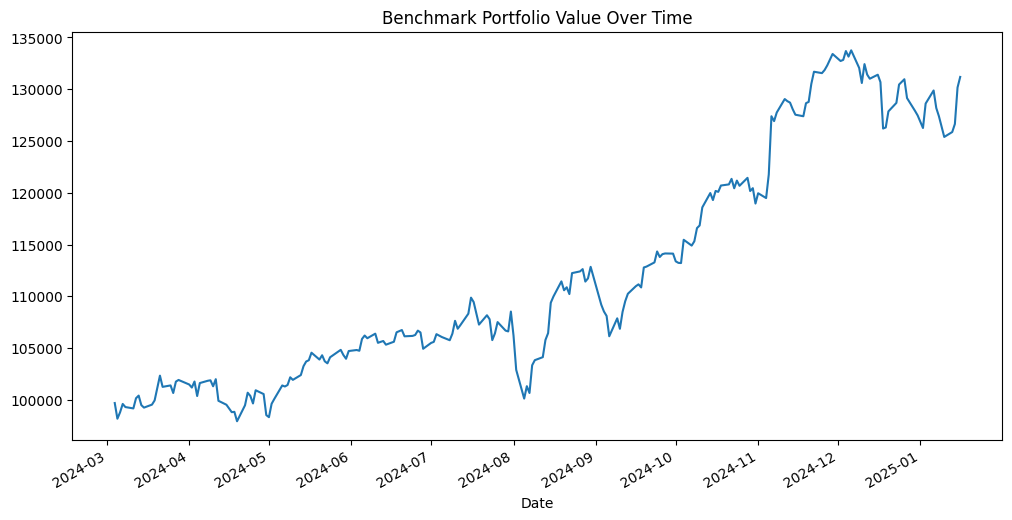

In [21]:
# Final bench mark strategy portfolio value
total_portfolio_value

benchmark_df['Total Benchmark'].plot(title='Benchmark Portfolio Value Over Time', figsize=(12, 6))

<Axes: title={'center': 'Benchmark Strategy Portfolio Value Over Time'}, xlabel='Date'>

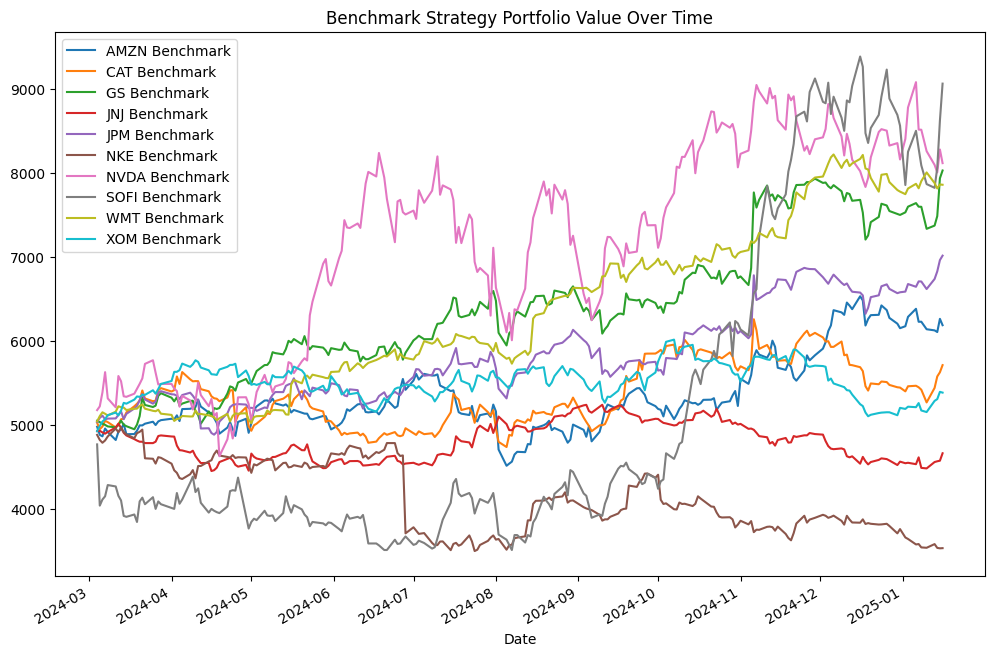

In [20]:
benchmark_df[['AMZN Benchmark', 'CAT Benchmark', 'GS Benchmark', 'JNJ Benchmark', 'JPM Benchmark', 'NKE Benchmark', 'NVDA Benchmark', 'SOFI Benchmark', 'WMT Benchmark','XOM Benchmark']].plot(figsize=(12, 8), title='Benchmark Strategy Portfolio Value Over Time')